## Car Price Prediction data Pre_processing 


In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [2]:
# Loading the data
df = pd.read_csv('./vehicles.csv')

In [3]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [4]:
# checking the data info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

### Drop Unnecessary columns

In [65]:
columns_to_drop = [
    'id', 'url', 'region_url', 'image_url', 'description', 'county', 'VIN'
]
df1 = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

### Drop duplicates

In [66]:
df1 = df1.drop_duplicates()

In [67]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 426843 entries, 0 to 426879
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426843 non-null  object 
 1   price         426843 non-null  int64  
 2   year          425649 non-null  float64
 3   manufacturer  409208 non-null  object 
 4   model         421577 non-null  object 
 5   condition     252761 non-null  object 
 6   cylinders     249187 non-null  object 
 7   fuel          423841 non-null  object 
 8   odometer      422454 non-null  float64
 9   title_status  418622 non-null  object 
 10  transmission  424298 non-null  object 
 11  drive         296293 non-null  object 
 12  size          120516 non-null  object 
 13  type          333996 non-null  object 
 14  paint_color   296662 non-null  object 
 15  state         426843 non-null  object 
 16  lat           420305 non-null  float64
 17  long          420305 non-null  float64
 18  posting_d

### Handling and Filtering out Outliars using IQR Method

In [68]:
# Calculate Q1 and Q3 for price
Q1 = df1['price'].quantile(0.25)
Q3 = df1['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame
df1 = df1[(df1['price'] >= lower_bound) & (df1['price'] <= upper_bound)]

In [69]:

# Identifying unique values
df1.nunique()

region             404
price            14452
year               113
manufacturer        42
model            28860
condition            6
cylinders            8
fuel                 5
odometer        103756
title_status         6
transmission         3
drive                3
size                 4
type                13
paint_color         12
state               51
lat              52746
long             53322
posting_date    374509
dtype: int64

In [70]:
#checking for null values
df1.isnull().sum()


region               0
price                0
year              1001
manufacturer     16794
model             4922
condition       168822
cylinders       173742
fuel              2955
odometer          4311
title_status      8008
transmission      2478
drive           128655
size            299606
type             91050
paint_color     127702
state                0
lat               6513
long              6513
posting_date        57
dtype: int64

In [71]:
#checking for uniques values in cylinders column
df1['cylinders'].unique()


array([nan, '8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders',
       'other', '3 cylinders', '10 cylinders', '12 cylinders'],
      dtype=object)

### Fill na values in Year and Odometer and covert to int datatype

In [72]:
df1['year'] = df1['year'].fillna(df['year'].median()).astype(int)
import pandas as pd
from datetime import datetime

# Assuming your DataFrame is named 'df' and the column is 'year'
current_year = datetime.now().year
df1['age'] = current_year - df1['year']

# (Optional) Drop the original 'year' column if you no longer need it

df1 = df1.drop('year', axis=1)


df1['odometer'] = df1['odometer'].fillna(df['odometer'].median())
df1['avg_mil'] = (df1['odometer'] / df1['age']).astype(int)
# Fill missing values for lat and long
df1['lat'] = df1['lat'].fillna(df1['lat'].median())
df1['long'] = df1['long'].fillna(df1['long'].median())

# Convert posting_date to datetime and extract features
df1['posting_date'] = pd.to_datetime(df1['posting_date'], errors='coerce',utc=True)
df1['posting_day'] = df1['posting_date'].dt.day
df1['posting_month'] = df1['posting_date'].dt.month
df1['posting_year'] = df1['posting_date'].dt.year


df1 = df1.drop(columns=['posting_date'])  # Drop original after feature extraction

In [73]:
# replacing Other, nan, None, nan.0 with NaN
df1['cylinders']= df1['cylinders'].replace(['other', 'nan', 'None', 'nan.0'], np.nan)

In [74]:


df1['cylinders'].unique()

array([nan, '8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders',
       '3 cylinders', '10 cylinders', '12 cylinders'], dtype=object)

In [75]:
cols1 = [
    'model', 'condition', 'drive', 'type', 'paint_color', 'cylinders', 'state',
    'manufacturer', 'fuel', 'title_status', 'transmission', 'region', 'size','posting_day','posting_month','posting_year'
]

In [76]:
# Replacing the null values with the mode of the column
for col in cols1:
    df1[col]=df1[col].fillna(df1[col].mode()[0])


In [77]:

# extrct numbers from the string
df1['cylinders'] = df1['cylinders'].astype(str).str.extract(r'(\d+)')
# convert to numeric
df1['cylinders'] = pd.to_numeric(df1['cylinders']).astype(int)


In [78]:
df1['lat'].value_counts()


lat
33.779214    9796
43.182400    2666
33.786500    2332
40.468785    2265
46.234838    1455
             ... 
32.629409       1
32.822400       1
32.630400       1
32.628739       1
32.601300       1
Name: count, Length: 52746, dtype: int64

In [79]:
american = ['harley-davidson', 'chevrolet', 'pontiac', 'ram', 'ford', 'gmc', 'tesla', 'jeep', 'dodge', 'cadillac', 'chrysler', 'lincoln', 'buick', 'saturn', 'mercury']
japanese = ['lexus', 'nissan', 'toyota', 'acura', 'honda', 'infiniti', 'subaru', 'mitsubishi', 'datsun', 'mazda']
german = ['volkswagen', 'mercedes-benz', 'bmw', 'audi', 'porsche']
italian = ['ferrari', 'fiat', 'alfa-romeo']
korean = ['kia', 'hyundai']
swedish = ['volvo']
english = ['rover', 'mini', 'land rover', 'jaguar']

def map_manufacturer(x):
    x = x.lower()
    if x in american:
        return 'American'
    elif x in japanese:
        return 'Japanese'
    elif x in german:
        return 'German'
    elif x in italian:
        return 'Italian'
    elif x in korean:
        return 'Korean'
    elif x in swedish:
        return 'Swedish'
    elif x in english:
        return 'English'
    else:
        return 'Rest Other'


df1['manufacturer_group'] = df1['manufacturer'].apply(map_manufacturer)


In [80]:
luxury_small = ['sedan', 'convertible', 'coupe', 'hatchback', 'other']
luxury_large = ['suv', 'wagon']
non_luxury_small = ['pickup', 'truck', 'offroad']
non_luxury_large = ['van', 'mini-van', 'bus']

def map_type(x):
    x = x.lower()
    if x in luxury_small:
        return 'luxury_small'
    elif x in luxury_large:
        return 'luxury_large'
    elif x in non_luxury_small:
        return 'non-luxury_small'
    elif x in non_luxury_large:
        return 'non-luxury_large'
    else:
        return 'Rest Other'
df1['type_group'] = df1['type'].apply(map_type)

In [81]:
light_color = ['white', 'silver', 'yellow', 'orange', 'green', 'custom']
dark_color = ['black', 'red', 'blue', 'purple', 'grey', 'brown']

def map_paint_color(x):
    x = x.lower()
    if x in light_color:
        return 'Light Color'
    elif x in dark_color:
        return 'Dark Color'
    else:
        return 'Rest Other'

df1['paint_color_group'] = df1['paint_color'].apply(map_paint_color)

In [82]:
cols3 = [
    'model', 'condition', 'drive', 'type', 'paint_color', 'state','manufacturer_group','type_group','paint_color_group',
    'manufacturer', 'fuel', 'title_status', 'transmission', 'region', 'size'
]

In [83]:
df1.to_csv('cleaned_car_data.csv', index=False)

### Encoding columns using LabelEncoder

In [84]:
encoders = {}

for col in cols3:
    le = LabelEncoder()
    df1[col] = le.fit_transform(df1[col])
    encoders[col] = le 

In [85]:
# Export the cleaned DataFrame to CSV

df1

,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,...,lat,long,age,avg_mil,posting_day,posting_month,posting_year,manufacturer_group,type_group,paint_color_group
0,277,6000,13,13859,2,6,2,85548.0,0,0,...,33.779214,-84.411811,12,7129,4.0,4.0,2021.0,0,1,1
1,105,11900,13,13859,2,6,2,85548.0,0,0,...,33.779214,-84.411811,12,7129,4.0,4.0,2021.0,0,1,1
2,111,21000,13,13859,2,6,2,85548.0,0,0,...,33.779214,-84.411811,12,7129,4.0,4.0,2021.0,0,1,1
3,396,1500,13,13859,2,6,2,85548.0,0,0,...,33.779214,-84.411811,12,7129,4.0,4.0,2021.0,0,1,1
4,131,4900,13,13859,2,6,2,85548.0,0,0,...,33.779214,-84.411811,12,7129,4.0,4.0,2021.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,397,23590,31,19195,2,6,2,32226.0,0,2,...,33.786500,-84.445400,6,5371,4.0,4.0,2021.0,4,1,1
426876,397,30590,41,22997,2,6,2,12029.0,0,2,...,33.786500,-84.445400,5,2405,4.0,4.0,2021.0,7,1,0
426877,397,34990,6,28543,2,6,0,4174.0,0,2,...,33.779214,-84.411811,5,834,4.0,4.0,2021.0,0,1,1
426878,397,28990,23,13135,2,6,2,30112.0,0,2,...,33.786500,-84.445400,7,4301,4.0,4.0,2021.0,4,1,1


### Seperate the target column from the Dataframe

In [26]:
x= df1.drop(['price','lat','long','posting_day','posting_month','posting_year','manufacturer','odometer'],axis=1)
y= df1['price']

### Split the data into training and testing set

In [27]:


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### Building Model using DecisionTree m

In [28]:
model_DT = DecisionTreeRegressor(max_depth=3,random_state=42)

In [29]:
model_DT.fit(x_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [30]:
y_pred_dt = model_DT.predict(x_test)

In [31]:
y_pred_dt

array([23492.70850914, 23492.70850914, 30609.76012726, ...,
        7984.28415832, 12870.52057507,  7984.28415832], shape=(83734,))

In [32]:
r2_score(y_test,y_pred_dt)

0.32267884013327897

### BUilding model using RandomForest

In [33]:


model_r =RandomForestRegressor(random_state=42)

In [34]:
# model_r.fit(x_train,y_train)

In [35]:
# y_pred_R = model_r.predict(x_test)

In [36]:
# r2_score(y_test,y_pred_R)

In [37]:
model_xgb = XGBRegressor(
    n_estimators=500,
    max_depth=10,
    learning_rate=0.6,
    # subsample=0.8,
    # colsample_bytree=0.8,
   
     min_child_weight=5,
    # reg_alpha=0.1,
    # reg_lambda=1,
    
 )

In [38]:
model_xgb.fit(x_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [39]:
y_pred_xgb = model_xgb.predict(x_test)

In [40]:
r2_score(y_test,y_pred_xgb)

0.7832192182540894

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_R, alpha=0.3, color='royalblue')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Car Prices (Random Forest)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.show()

NameError: name 'y_pred_R' is not defined

<Figure size 800x600 with 0 Axes>

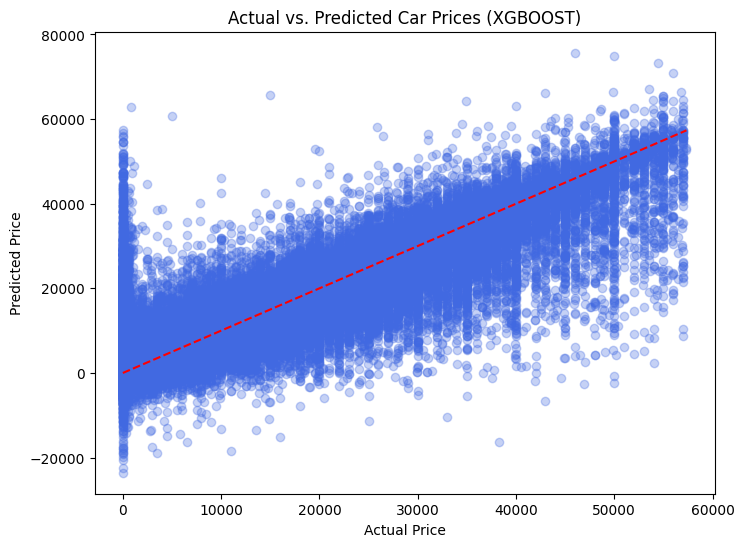

In [108]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.3, color='royalblue')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Car Prices (XGBOOST)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.show()

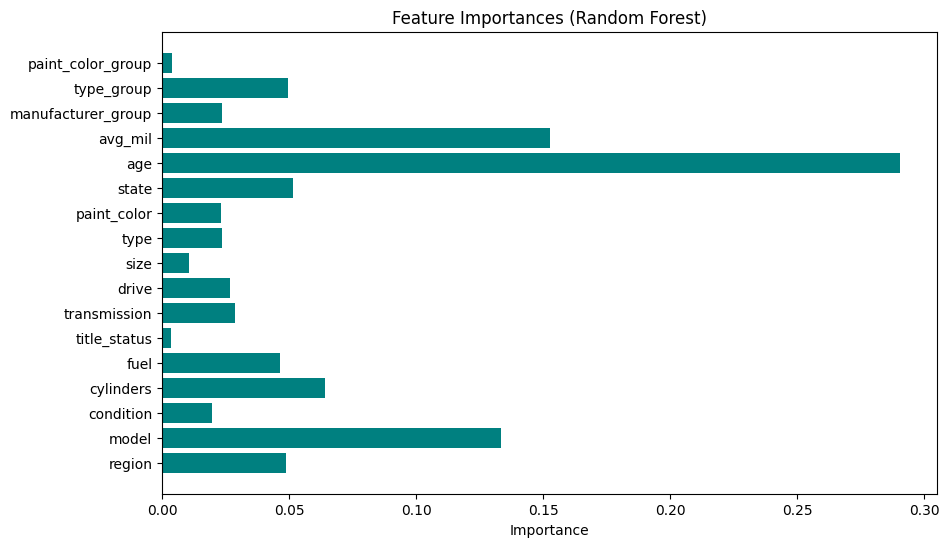

In [42]:
importances = model_r.feature_importances_
features = x_train.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='teal')
plt.xlabel('Importance')
plt.title('Feature Importances (Random Forest)')
plt.show()

In [43]:
import seaborn as sns